<a href="https://colab.research.google.com/github/AnanyaGodse/Image-Processing-and-Computer-Vision-I/blob/main/IPCV_Experiment_9_Region_Based_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **LAB 9 - Region Based Segmentation**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('mona lisa.jpg', cv2.IMREAD_GRAYSCALE)

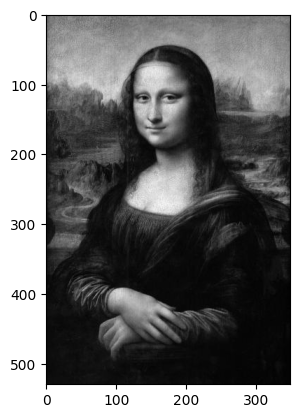

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

**Region Growing:**

Region growing is a process that starts with a seed pixel and adds neighboring pixels to this region if they meet a set similarity criterion (e.g., color, intensity, or texture).

***Applications:***

1. Medical Imaging: Commonly used in segmenting anatomical structures like organs or tumors in MRI and CT scans, where specific tissue types need to be identified and isolated.

2. Satellite and Aerial Image Analysis: Helpful in identifying and classifying natural features like forests, water bodies, and urban areas, where similar pixel characteristics are grouped to create meaningful segments.

3. Object Detection and Recognition: Used in applications where objects need to be isolated from the background, such as in autonomous vehicles, facial recognition, or agricultural monitoring.

4. Remote Sensing: Useful in environmental monitoring and disaster management, where regions of interest (e.g., flooded areas, deforested regions) need to be segmented for analysis

In [ ]:
def region_growing(image, seed, threshold):

    h, w = image.shape

    segmented = np.zeros_like(image)

    to_check = [seed]

    seed_value = image[seed]

    while to_check:
        x, y = to_check.pop()

        if x < 0 or x >= h or y < 0 or y >= w or segmented[x, y] != 0:
            continue

        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255

            to_check.append((x + 1, y))  # down
            to_check.append((x - 1, y))  # up
            to_check.append((x, y + 1))  # right
            to_check.append((x, y - 1))  # left

    return segmented

In [ ]:
seed_point = (150, 100)
threshold = 15

segmented_img = region_growing(img, seed_point, threshold)

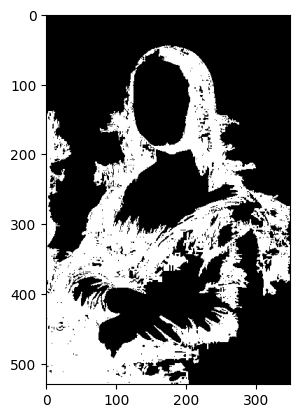

In [ ]:
plt.imshow(segmented_img, cmap='gray')
plt.show()

**Region Splitting & Merging:**

Region splitting and merging involve dividing an image into regions and then merging similar adjacent regions based on defined criteria.

***Applications:***
1. Texture Segmentation: Ideal for segmenting images based on different textures, such as in industrial quality inspection where surfaces or materials need to be examined for uniformity or defects.

2. Urban Planning and Land Use Analysis: Applied to high-resolution satellite images to categorize urban, rural, and natural areas by splitting and then merging similar regions, facilitating urban development and environmental planning.

3. Image Compression: Regions with similar attributes are grouped together, reducing the amount of data needed to represent the image and thus enabling efficient image compression techniques.

4. Video Object Tracking: Used to identify and follow moving objects by segmenting the initial frames and updating regions as objects move across the frames.

In [ ]:
def is_similar(region, threshold):
    if region.size == 0:
        return True
    mean_intensity = np.mean(region)
    std_dev = np.std(region)
    return std_dev < threshold

In [ ]:
def split_region(image, x, y, width, height, threshold):
    if width <= 1 or height <= 1:
        return []

    region = image[y:y + height, x:x + width]

    if is_similar(region, threshold):
        return [region]
    else:
        mid_x = x + width // 2
        mid_y = y + height // 2
        regions = []
        regions.extend(split_region(image, x, y, width // 2, height // 2, threshold))
        regions.extend(split_region(image, mid_x, y, width // 2, height // 2, threshold))
        regions.extend(split_region(image, x, mid_y, width // 2, height // 2, threshold))
        regions.extend(split_region(image, mid_x, mid_y, width // 2, height // 2, threshold))
        return regions

In [ ]:
def merge_regions(regions, threshold):
    merged = []

    for region in regions:
        if len(merged) == 0:
            merged.append(region)
        else:
            last_region = merged[-1]
            if is_similar(last_region, threshold) and last_region.shape == region.shape:
                combined_region = (last_region + region) // 2
                merged[-1] = combined_region
            else:
                merged.append(region)

    return merged

In [ ]:
def region_split_merge(image, split_threshold, merge_threshold):
    height, width = image.shape
    regions = split_region(image, 0, 0, width, height, split_threshold)
    merged_regions = merge_regions(regions, merge_threshold)
    return merged_regions

In [ ]:
split_threshold = 52
merge_threshold = 52

regions = region_split_merge(img, split_threshold, merge_threshold)

In [ ]:
num_regions = len(regions)
cols = 4
rows = (num_regions + cols - 1) // cols

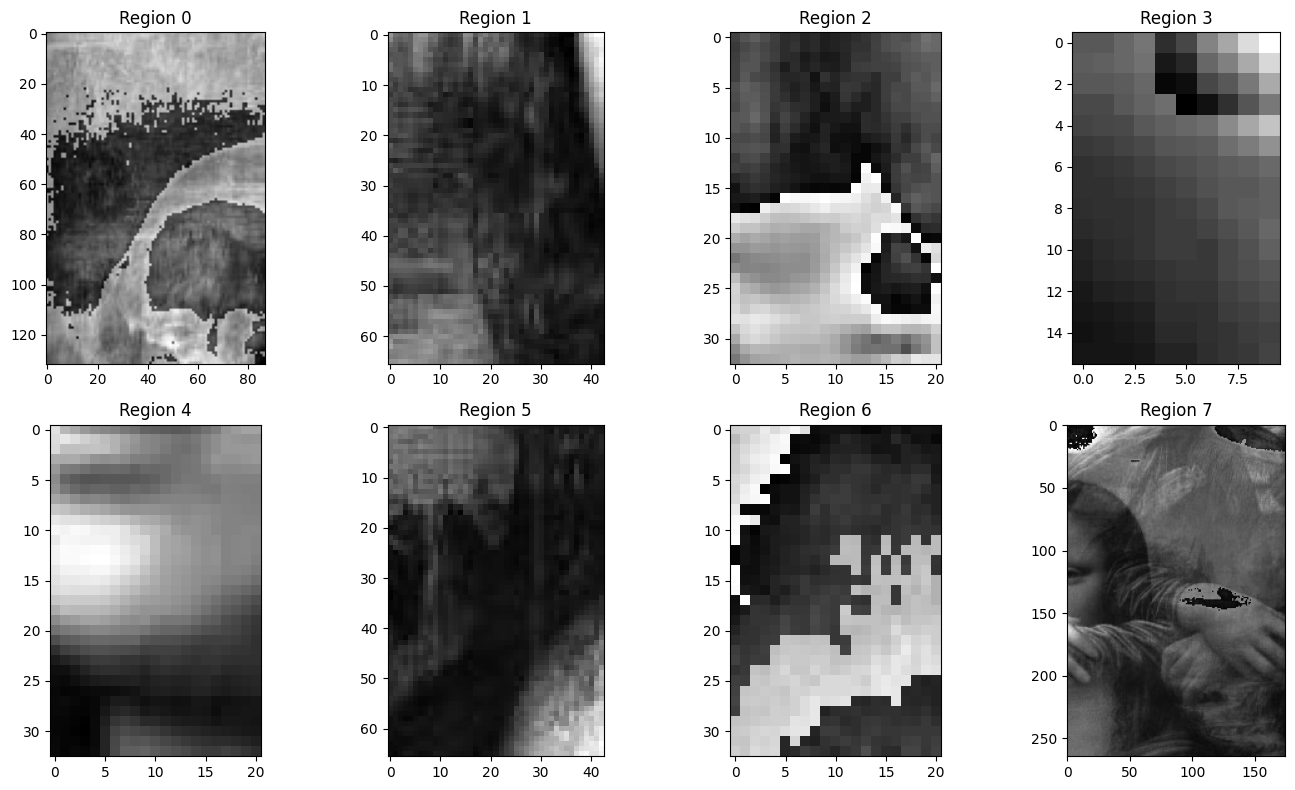

In [ ]:
plt.figure(figsize=(14, 4 * rows))

for i, region in enumerate(regions):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(region, cmap='gray')
    plt.title(f'Region {i}')

plt.tight_layout()
plt.show()

**Conclusion:**  

Region Growing and Region Splitting & Merging which are both image segmentation techniques were implemented successfully. Their applications were also studied.